In [27]:
# This code extracts necessary information from the data created in preprocessing file.
# This code is specific to 2AFC - contrast task for the sideBiasLateralisation project.

%reload_ext autoreload
%autoreload 2

#load libraries
import glob
import os
import json
import pandas as pd
from datetime import datetime
import numpy as np
import main_funcs as mfun
import plot_funcs as pfun
import utils_funcs as utils 
import LakLabAnalysis.Utility.utils_funcs as utils_laklab
import LakLabAnalysis.Utility.commonPlot_funcs as cpfun # utils is from Vape - catcher file: 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pickle



In [ ]:
animalList= ['HA011']
info = mfun.analysis(animalList=animalList)
info.recordingList = info.recordingList[
    (info.recordingList['performance'] > 60) &
    (info.recordingList['twoP']) &
    (info.recordingList['duration'] > 20)
    ].reset_index(drop=True)
print('Total Session fits the selection: ' +  str(info.recordingList.shape[0]))
info = mfun.update_info(info)
info.recordingList = info.recordingList[(info.recordingList['imagingDataExtracted']) & (info.recordingList['twoP'])].reset_index(drop=True)
print('Total Session fits the selection: ' +  str(info.recordingList.shape[0]))

Env: decMaking310
Computer: Huriye Windows


In [20]:
# Plotting params
pfun.set_figure()

## Parameters
fRate = 1000/30
responsiveness_test_duration = 1000.0 #in ms 
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysisWindowDur = 750 # in ms
analysisWindowDur = int(np.ceil(analysisWindowDur/fRate))
simulationDur_ms = 2000.0 # in ms 
simulationDur  = int(np.ceil(simulationDur_ms/fRate))
duration ='5'

pd.set_option('mode.chained_assignment', None)


Stimulus contrast representation

In [21]:
# Single-session Stimulus Contrasts Representation
# Plot rewarded trials (stim aligned)
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        figure_path = os.path.join(info.analysisPath, animalList[0],'session')
        if not os.path.exists(figure_path):
            os.makedirs(figure_path)
        pfun.plot_aligned_by_contrasts(
            recordingList=info.recordingList.iloc[[ind]],
            subfolder='responsive_neurons',
            save_path=figure_path,
            contrast_conditions=['0 Rewarded', '0.0625 Rewarded', '0.125 Rewarded', '0.25 Rewarded', '0.5 Rewarded'],
            #contrast_conditions=['-0.0625 Rewarded','-0.125 Rewarded', '-0.25 Rewarded', '-0.5 Rewarded', '0 Rewarded', '0.0625 Rewarded', '0.125 Rewarded', '0.25 Rewarded', '0.5 Rewarded']
            alignment='stimulus',
            baseline_window=[-1, 0]
        )

Starting stimulus-aligned activity by combined contrasts for all sessions...
Plotting stimulus-aligned activity for session: 2025-05-16_1_MBL015
✓ Successfully plotted and saved for session: 2025-05-16_1_MBL015
Completed stimulus-aligned activity by combined contrasts for all sessions.
Starting stimulus-aligned activity by combined contrasts for all sessions...
Plotting stimulus-aligned activity for session: 2025-05-20_1_MBL015
✓ Successfully plotted and saved for session: 2025-05-20_1_MBL015
Completed stimulus-aligned activity by combined contrasts for all sessions.
Starting stimulus-aligned activity by combined contrasts for all sessions...
Plotting stimulus-aligned activity for session: 2025-05-21_1_MBL015
✓ Successfully plotted and saved for session: 2025-05-21_1_MBL015
Completed stimulus-aligned activity by combined contrasts for all sessions.
Starting stimulus-aligned activity by combined contrasts for all sessions...
Plotting stimulus-aligned activity for session: 2025-05-22_1_M

[np.float64(-0.5), np.float64(-0.25), np.float64(-0.125), np.float64(0.0), np.float64(0.125), np.float64(0.25), np.float64(0.5)]
Figure saved at: C:\Users\Huriye\Documents\code\sideBiasLateralisation\analysis\MBL015\MBL015_combined_psychometric.png


c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2431: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2441: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


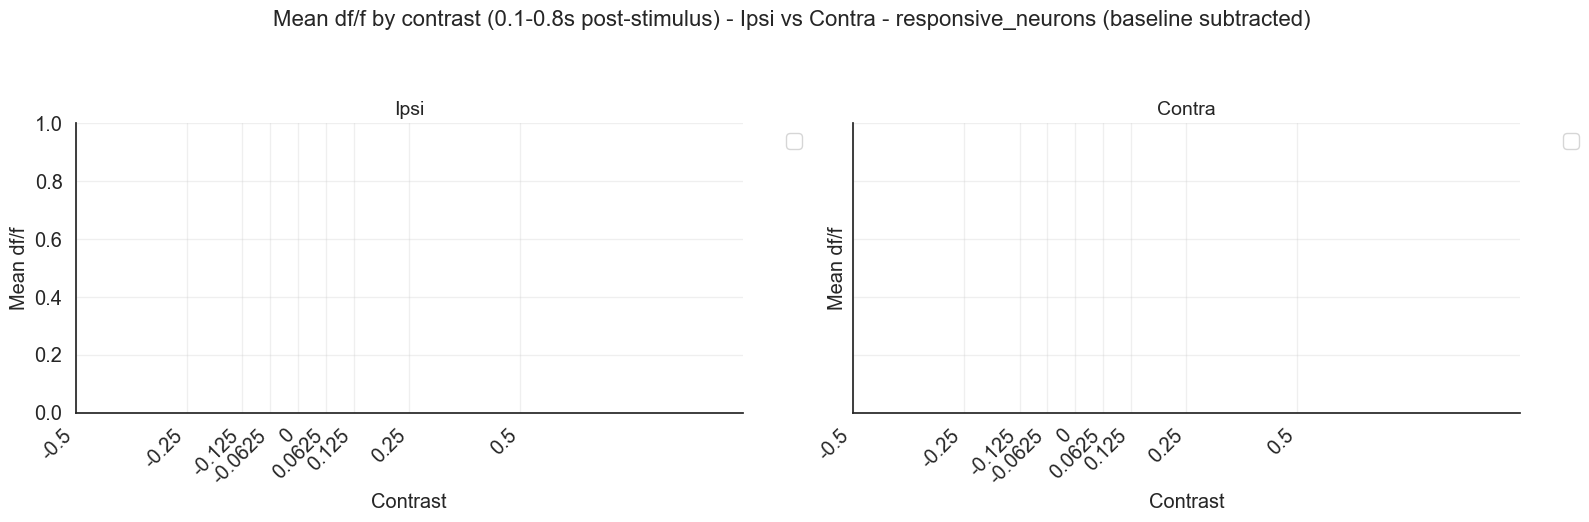

In [26]:
# ALL SESSIONS: Mean trace Stimulus Contrasts Representation
figure_path = os.path.join(info.analysisPath, animalList[0])

# Plot combined psychometric
pfun.plot_combined_psychometric(
    info=info,
    save_path=figure_path
  # Will use default path if None
)

if not os.path.exists(figure_path):
    os.makedirs(figure_path)

pfun.plot_mean_sem_across_sessions_by_contrasts(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=figure_path,
    alignment='stimulus',
    baseline_window=[-0.2, 0],
    contrast_conditions = ['-0.125 Rewarded', '-0.25 Rewarded', '-0.5 Rewarded', '0 Rewarded', '0.125 Rewarded', '0.25 Rewarded', '0.5 Rewarded'],
    title=None
)

pfun.plot_mean_sem_across_sessions_by_contrasts(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=figure_path,
    contrast_conditions=None,
    alignment='reward',
    baseline_window=[-0.2, 0],
    title=None
)

pfun.plot_mean_dff_by_contrast( # Average
    recordingList=info.recordingList,
    event_type='stimulus',
    time_window=[0.1, 0.6],
    subfolder='responsive_neurons',
    save_path=figure_path,
    contrasts_rewarded=['-0.125 Rewarded', '-0.25 Rewarded', '-0.5 Rewarded', '0 Rewarded', '0.125 Rewarded', '0.25 Rewarded', '0.5 Rewarded'], 
    contrast_values=[ -0.125, -0.25, -0.5, 0, 0.125, 0.25, 0.5]
)

pfun.plot_mean_dff_by_contrast_hemi_ipsi_contra(
    recordingList=info.recordingList,
    event_type='stimulus',
    time_window=[0.1, 0.8],
    subfolder='responsive_neurons',
    save_path=figure_path
)


Plotting single-neuron traces for session: 2025-07-26_1_HAT010


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

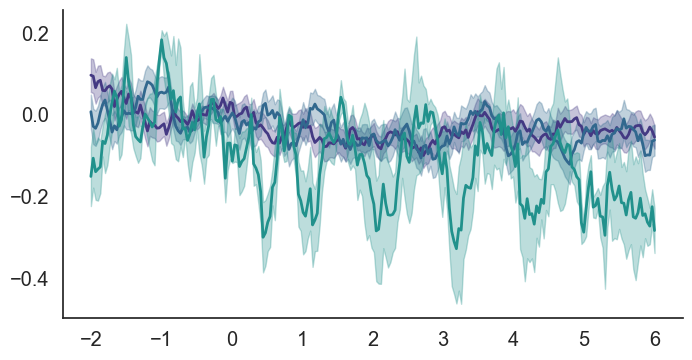

In [ ]:
# EACH CELL: Stimulus Contrast Representation - Individual cell traces
# Plot individual cell traces by contrast
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        session_path = info.recordingList.analysispathname[ind]
        session_name = info.recordingList.sessionName[ind]
        subfolder = 'responsive_neurons'  # or 'all_neurons'
        subfolder_path = os.path.join(session_path, subfolder)
        dffTrace_file = os.path.join(subfolder_path, 'imaging-dffTrace.pkl')
        if not os.path.exists(dffTrace_file):
            print(f"✗ File not found: {dffTrace_file}")
            continue
        with open(dffTrace_file, 'rb') as f:
            dffTrace_reward, dffTrace_stimuli, dffTrace_choice = pickle.load(f)
        print(f'Plotting single-neuron traces for session: {session_name}')
        pfun.plot_single_neuron_traces_by_contrast(
            dffTrace_stimuli=dffTrace_stimuli,
            session_name=session_name,
            save_path=os.path.join(subfolder_path, 'stimulus_contrasts'),
            time_window=[-2, 6],
            baseline_window=[-1.0, 0.0],
        )

c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2447: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2457: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


Figure saved in: C:\Users\Huriye\Documents\code\sideBiasLateralisation\population_analysis\stimulus_contrasts


In [19]:
# POPULATION ANALYSIS: Stimulus Contrast Representation
# plot mean dff by contrast across sessions, divided by bias and no bias

pfun.plot_mean_dff_by_contrast_bias_ipsi_contra(
    recordingList=info.recordingList,
    event_type='stimulus',
    time_window=[0.1, 0.8],
    subfolder='responsive_neurons',
    save_path=stim_save_path
)
print('Figure saved in: ' + stim_save_path)

c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
c:\Users\Huriye\Documents\code\sideBiasLateralisation\plot_funcs.py:2610: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


Figure saved in: C:\Users\Huriye\Documents\code\sideBiasLateralisation\population_analysis\stimulus_contrasts


In [ ]:
# POPULATION ANALYSIS: Stimulus Contrast Representation
# plot mean dff by contrast across sessions, divided first by hemi ipsi and hemi contra, then by bias and no bias

pfun.plot_mean_dff_by_contrast_hemi_bias_4panels(
    recordingList=info.recordingList,      
    event_type='stimulus',                 
    time_window=[0.1, 0.8],                
    subfolder='responsive_neurons',        
    save_path=stim_save_path,
    use_zscored=True,
    title='Mean df/f by absolute contrast for 4 Hemi/Bias groups'
)
print('Figure saved in: ' + stim_save_path)

Starting stimulus-aligned activity by stim side and contrasts for all sessions...
Plotting stimulus-aligned activity by stim side for session: 2025-07-26_1_HAT010
✓ Successfully plotted and saved for session: 2025-07-26_1_HAT010
Completed stimulus-aligned activity by stim side and contrasts for all sessions.
Starting stimulus-aligned activity by stim side and contrasts for all sessions...
Plotting stimulus-aligned activity by stim side for session: 2025-07-29_1_HAT010
✗ Error plotting session 2025-07-29_1_HAT010: [Errno 2] No such file or directory: 'C:\\Users\\Huriye\\Documents\\code\\sideBiasLateralisation\\analysis\\2025-07-29_HAT010_1\\responsive_neurons\\stimulus_contrasts\\2025-07-29_1_HAT010_stimulus_aligned_by_stim_side_contrasts.png.png'
Completed stimulus-aligned activity by stim side and contrasts for all sessions.
Starting stimulus-aligned activity by stim side and contrasts for all sessions...
Plotting stimulus-aligned activity by stim side for session: 2025-07-31_1_HAT010

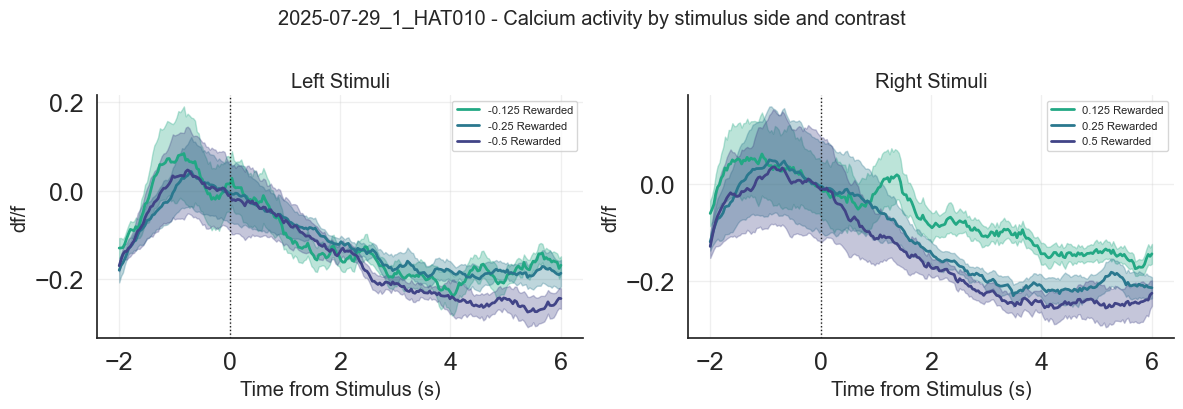

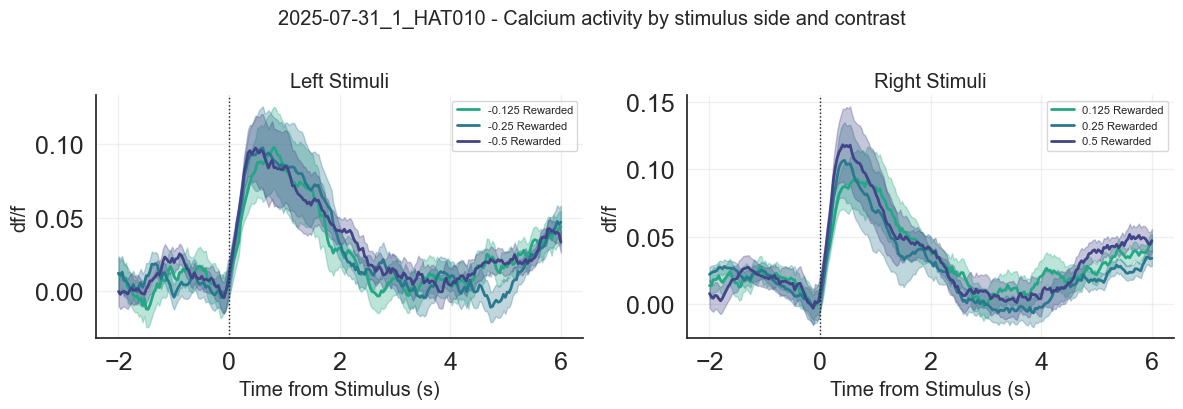

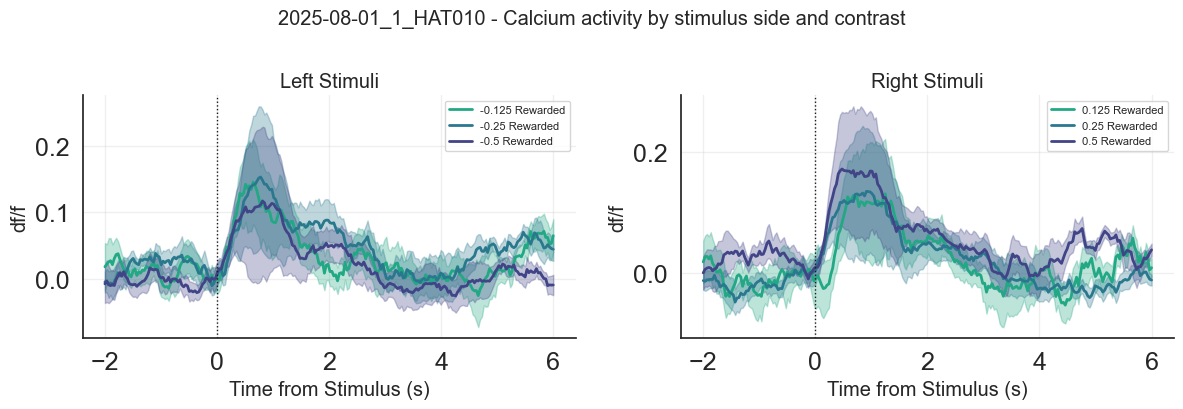

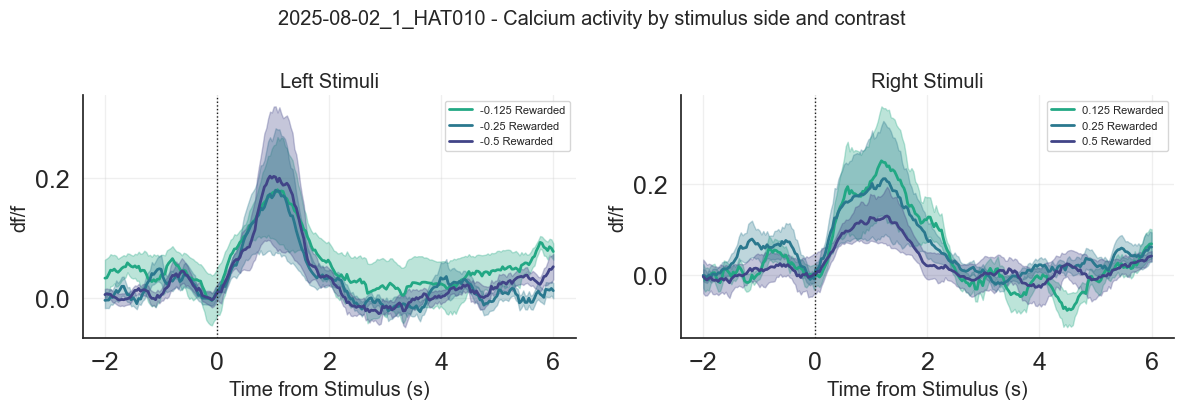

In [20]:
# Single-session Lateralised Stimulus Contrast Representation
# Plot rewarded trials (stimulus aligned) in left and right stim
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons')
        pfun.plot_aligned_by_stim_side_contrasts(
            recordingList=info.recordingList.iloc[[ind]],
            subfolder='responsive_neurons',
            save_path=os.path.join(subfolder_path, 'stimulus_contrasts'),
            contrast_conditions_left=None,
            contrast_conditions_right=None,
            alignment='stimulus'
        )

In [21]:
# POPULATION ANALYSIS: Lateralised Stimulus Contrast Representation
# Plot rewarded vs unrewarded trials (stim aligned) in left and right stim

pfun.plot_mean_sem_across_sessions_by_stim_side(
    recordingList=info.recordingList,
    alignment='stimulus',  # 'stimulus', 'reward', 'choice'
    subfolder='responsive_neurons',
    save_path=stim_save_path
)
print('Figure saved in: ' + stim_save_path)

Figure saved in: C:\Users\Huriye\Documents\code\sideBiasLateralisation\population_analysis\stimulus_contrasts


In [22]:
# POPULATION ANALYSIS: Lateralised Stimulus Representation 
# Plot difference in df/f between contra and ipsi (stimulus) neurons by lateralisation - relative to the animal's window

# Get the dataframe with the contra-ipsi diff
df = utils.get_contra_ipsi_diff_cellwise_df(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    coords_csv_path="C:/Users/Lak Lab/Documents/Github/sideBiasLateralisation/analysis/recording_coords.csv",
    alignment='stimulus',
    key_contra='Stim Hemi Contra',
    key_ipsi='Stim Hemi Ipsi'
)
#print(df.head())
pfun.plot_AP_ML_hemi_contra_ipsi(df, save_path=stim_save_path, alignment='stimulus')

print('Figure saved in: ' + stim_save_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Lak Lab/Documents/Github/sideBiasLateralisation/analysis/recording_coords.csv'

In [ ]:
# POPULATION ANALYSIS: Lateralised Stimulus Representation - 0 Rewarded contrast
# Plot difference in df/f between contra and ipsi (stimulus) neurons by lateralisation - relative to the animal's window

# Get the dataframe with the contra-ipsi diff
df = utils.get_contra_ipsi_diff_cellwise_df(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    coords_csv_path="C:/Users/Lak Lab/Documents/Github/sideBiasLateralisation/analysis/recording_coords.csv",
    alignment='stimulus',
    key_contra='0 Rewarded Hemi Contra',
    key_ipsi='0 Rewarded Hemi Ipsi'
)
#print(df.head())
pfun.plot_AP_ML_hemi_contra_ipsi(df, save_path=stim_save_path, alignment='stimulus')

print('Figure saved in: ' + stim_save_path)

RPE representation

In [ ]:
# Create rpe subfolder for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons', 'rpe')
        os.makedirs(subfolder_path, exist_ok=True)

# Create rpe subfolder for population analysis
rpe_save_path = os.path.join(save_path, 'rpe')
os.makedirs(rpe_save_path, exist_ok=True)

print('rpe subfolder created for all sessions and for population analysis')

In [ ]:
# Single-session RPE Representation
# Plot rewarded trials (reward aligned)
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons')
        pfun.plot_aligned_by_contrasts(
            recordingList=info.recordingList.iloc[[ind]],
            subfolder='responsive_neurons',
            save_path=os.path.join(subfolder_path, 'rpe'),
            contrast_conditions=None,
            alignment='reward',
            baseline_window=[-0.2, 0]
        )


In [ ]:
# POPULATION ANALYSIS: Mean trace RPE Representation
# Plot rewarded trials (reward aligned)

pfun.plot_mean_sem_across_sessions_by_contrasts(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=rpe_save_path,
    contrast_conditions=None,
    alignment='reward',
    baseline_window=[-0.2, 0],
    title=None
)
print('Figure saved in: ' + rpe_save_path)

In [ ]:
# POPULATION ANALYSIS: RPE Representation
# plot mean dff by contrast across sessions within a time window of ±250 ms around the peak of the mean curve

pfun.plot_peak_window_mean_dff_by_contrast(
    recordingList=info.recordingList,
    event_type='reward',
    subfolder='responsive_neurons',
    save_path=rpe_save_path,
    contrasts_rewarded=['-0.0625 Rewarded','-0.125 Rewarded', '-0.25 Rewarded', '-0.5 Rewarded', '0 Rewarded', '0.0625 Rewarded', '0.125 Rewarded', '0.25 Rewarded', '0.5 Rewarded'], 
    contrast_values=[-0.0625, -0.125, -0.25, -0.5, 0, 0.0625, 0.125, 0.25, 0.5]
)
print('Figure saved in: ' + rpe_save_path)

In [ ]:
# POPULATION ANALYSIS: RPE Representation
# plot mean dff by contrast across sessions within a time window of ±250 ms around the peak of the mean curve
# divided by recording side (ipsi or contra)

pfun.plot_peak_window_mean_dff_by_contrast_hemi_ipsi_contra(
    recordingList=info.recordingList,
    event_type='reward',
    save_path=rpe_save_path,
    subfolder='responsive_neurons',
    contrast_conditions_ipsi = ['-0.0625 Rewarded Hemi Ipsi', '-0.125 Rewarded Hemi Ipsi', '-0.25 Rewarded Hemi Ipsi', '-0.5 Rewarded Hemi Ipsi', '0 Rewarded Hemi Ipsi', '0.0625 Rewarded Hemi Ipsi', '0.125 Rewarded Hemi Ipsi', '0.25 Rewarded Hemi Ipsi', '0.5 Rewarded Hemi Ipsi'],
    contrast_conditions_contra = ['0.0625 Rewarded Hemi Contra', '0.125 Rewarded Hemi Contra', '0.25 Rewarded Hemi Contra', '0.5 Rewarded Hemi Contra', '0 Rewarded Hemi Contra', '0.0625 Rewarded Hemi Contra', '0.125 Rewarded Hemi Contra', '0.25 Rewarded Hemi Contra', '0.5 Rewarded Hemi Contra']
)
print('Figure saved in: ' + rpe_save_path)

In [ ]:
# POPULATION ANALYSIS: RPE Representation
# plot mean dff by contrast across sessions, divided by bias and no bias

pfun.plot_peak_window_mean_dff_by_contrast_bias_ipsi_contra(
    recordingList=info.recordingList,
    event_type='reward',
    subfolder='responsive_neurons',
    save_path=rpe_save_path,
    contrast_conditions_bias = ['-0.0625 Rewarded Bias Ipsi', '-0.125 Rewarded Bias Ipsi', '-0.25 Rewarded Bias Ipsi', '-0.5 Rewarded Bias Ipsi', '0 Rewarded Bias Ipsi', '0.0625 Rewarded Bias Ipsi', '0.125 Rewarded Bias Ipsi', '0.25 Rewarded Bias Ipsi', '0.5 Rewarded Bias Ipsi'],
    contrast_conditions_nobias = ['0.0625 Rewarded Bias Contra', '0.125 Rewarded Bias Contra', '0.25 Rewarded Bias Contra', '0.5 Rewarded Bias Contra', '0 Rewarded Bias Contra', '0.0625 Rewarded Bias Contra', '0.125 Rewarded Bias Contra', '0.25 Rewarded Bias Contra', '0.5 Rewarded Bias Contra']
)
print('Figure saved in: ' + rpe_save_path)

In [ ]:
# Single-session Lateralised RPE Representation
# Plot rewarded vs unrewarded trials (stim aligned) in left and right stim
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons')
        pfun.plot_aligned_by_stim_side_contrasts(
            recordingList=info.recordingList.iloc[[ind]],
            subfolder='responsive_neurons',
            save_path=os.path.join(subfolder_path, 'rpe'),
            contrast_conditions_left=None,
            contrast_conditions_right=None,
            alignment='reward'
        )
        

In [ ]:
# POPULATION ANALYSIS: Lateralised RPE Representation
# Plot rewarded vs unrewarded trials (stim aligned) in left and right stim

pfun.plot_mean_sem_across_sessions_by_stim_side(
    recordingList=info.recordingList,
    alignment='reward',  # 'stimulus', 'reward', 'choice'
    subfolder='responsive_neurons',
    save_path=rpe_save_path
)
print('Figure saved in: ' + rpe_save_path)

Choice representation

In [ ]:
# Create choice subfolder for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons', 'choice')
        os.makedirs(subfolder_path, exist_ok=True)

# Create choice subfolder for population analysis
choice_save_path = os.path.join(save_path, 'choice')
os.makedirs(choice_save_path, exist_ok=True)

print('choice subfolder created for all sessions and for population analysis')

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Left/Right
# Plot trials (choice aligned)

pfun.plot_mean_sem_by_choice_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    time_window=[-2, 6],
    save_path=choice_save_path,
    key_pair=('Left Choices', 'Right Choices')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Left/Right
# Plot choice-aligned mean df/f in a window of 500 ms around the peak

pfun.scatter_peak_window_mean_by_key_pair(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    window_ms=500,
    save_path=choice_save_path,
    title=None,
    key_pair=('Left Choices', 'Right Choices')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Hemi Ipsi/Contra
# Plot trials (choice aligned)

pfun.plot_mean_sem_by_choice_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    time_window=[-2, 6],
    save_path=choice_save_path,
    key_pair=('Choice Hemi Ipsi', 'Choice Hemi Contra')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Hemi Ipsi/Contra
# Plot choice-aligned mean df/f in a window of 500 ms around the peak

pfun.scatter_peak_window_mean_by_key_pair(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    window_ms=500,
    save_path=choice_save_path,
    title=None,
    key_pair=('Choice Hemi Ipsi', 'Choice Hemi Contra')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Bias Ipsi/Contra
# Plot trials (choice aligned)

pfun.plot_mean_sem_by_choice_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    time_window=[-2, 6],
    save_path=choice_save_path,
    key_pair=('Choice Bias Ipsi', 'Choice Bias Contra')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Mean trace Choice Representation - Bias Ipsi/Contra
# Plot choice-aligned mean df/f in a window of 500 ms around the peak

pfun.scatter_peak_window_mean_by_key_pair(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='choice',
    window_ms=500,
    save_path=choice_save_path,
    title=None,
    key_pair=('Choice Bias Ipsi', 'Choice Bias Contra')
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Choice Representation 
# Plot difference in df/f between contra and ipsi (choice) neurons by lateralisation within the FOV

pfun.plot_cellwise_contra_ipsi_diff_by_ypix(
    info.recordingList,
    subfolder='responsive_neurons',
    recside_json_path='C:/Users/Lak Lab/Documents/Github/sideBiasLateralisation/analysis/recside_data.json',
    save_path=choice_save_path
)
print('Figure saved in: ' + choice_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Choice Representation 
# Plot difference in df/f between contra and ipsi (choice) neurons by lateralisation - relative to the animal's window

# Get the dataframe with the contra-ipsi diff
df = utils.get_contra_ipsi_diff_cellwise_df(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    coords_csv_path="C:/Users/Lak Lab/Documents/Github/sideBiasLateralisation/analysis/recording_coords.csv",
    alignment='choice'
)
#print(df.head())
pfun.plot_AP_ML_hemi_contra_ipsi(df, save_path=choice_save_path, alignment='choice')

print('Figure saved in: ' + choice_save_path)

Reward representation

In [ ]:
# Create reward subfolder for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons', 'reward')
        os.makedirs(subfolder_path, exist_ok=True)

# Create reward subfolder for population analysis
reward_save_path = os.path.join(save_path, 'reward')
os.makedirs(reward_save_path, exist_ok=True)

print('reward subfolder created for all sessions and for population analysis')

In [ ]:
# POPULATION ANALYSIS: Reward Representation 
# Plot rew - unrew across sessions (reward aligned) 

pfun.plot_reward_aligned_rewarded_vs_unrewarded_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=reward_save_path
)
print('Figure saved in: ' + reward_save_path)

In [ ]:
# POPULATION ANALYSIS: Reward Representation 
# Plot rew - unrew across sessions (reward aligned) within a time window 

pfun.scatter_peak_window_mean_by_key_pair(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    alignment='reward',
    window_ms=500,
    save_path=reward_save_path,
    title=None,
    key_pair=('Rewarded', 'Unrewarded'),
    colors=('red', 'black')
)
print('Figure saved in: ' + reward_save_path)

In [ ]:
# Single-session Lateralised Reward Representation 
# Plot rew vs unrew trials (reward aligned) in contra and ipsi neurons (compared to recording side)
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        session_path = info.recordingList.analysispathname[ind]
        session_name = info.recordingList.sessionName[ind]
        subfolder = 'responsive_neurons'  # or 'all_neurons'
        subfolder_path = os.path.join(session_path, subfolder)
        
        # Check if the required pickle file exists
        pickle_file = os.path.join(subfolder_path, 'imaging-dffTrace_mean.pkl')
        if not os.path.exists(pickle_file):
            print(f"✗ File not found: {pickle_file}")
            continue
            
        print(f'Plotting reward-aligned activity for session: {session_name}')
        
        try:
            pfun.plot_reward_aligned_stim_ipsi_contra_diff(
                session_path=session_path,
                session_name=session_name,
                subfolder=subfolder,
                save_path=os.path.join(subfolder_path, 'reward')
            )
            print(f"✓ Successfully plotted and saved for session: {session_name}")
        except Exception as e:
            print(f"✗ Error plotting session {session_name}: {str(e)}")
            continue

print("Completed reward-aligned activity plotting for all sessions.")


In [ ]:
# POPULATION ANALYSIS: Lateralised Reward Representation 
# Plot rew - unrew across sessions (reward aligned) in contra and ipsi neurons (compared to recording side)
pfun.plot_reward_aligned_stim_ipsi_contra_diff_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=reward_save_path
)
print('Figure saved in: ' + reward_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Reward Representation 
# Plot rew - unrew across sessions (reward aligned) within a time window in contra and ipsi neurons (compared to recording side)

pfun.plot_reward_aligned_stim_ipsi_contra_diff_scatter_window_across_sessions(
    recordingList=info.recordingList,
    time_window=[0.1, 0.8],
    subfolder='responsive_neurons',
    save_path=reward_save_path
)
print('Figure saved in: ' + reward_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Reward Representation 
# Plot rew - unrew across sessions (reward aligned) in contra and ipsi neurons (compared to bias side)
pfun.plot_reward_aligned_stim_ipsi_contra_diff_across_sessions(
    recordingList=info.recordingList,
    subfolder='responsive_neurons',
    save_path=reward_save_path,
    key_type='bias'
)
print('Figure saved in: ' + reward_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Reward Representation 
# Plot rew - unrew across sessions (reward aligned) within a time window in contra and ipsi neurons (compared to bias side)

pfun.plot_reward_aligned_stim_ipsi_contra_diff_scatter_window_across_sessions(
    recordingList=info.recordingList,
    time_window=[0.1, 0.8],
    subfolder='responsive_neurons',
    save_path=reward_save_path,
    key_type='bias'
)
print('Figure saved in: ' + reward_save_path)

BIAS

In [ ]:
# Create bias subfolder for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        subfolder_path = os.path.join(info.recordingList.analysispathname[ind], 'responsive_neurons', 'bias')
        os.makedirs(subfolder_path, exist_ok=True)

# Create bias subfolder for population analysis
bias_save_path = os.path.join(save_path, 'bias')
os.makedirs(bias_save_path, exist_ok=True)

print('bias subfolder created for all sessions and for population analysis')

In [ ]:
# Single-session Lateralised Choice BIAS representation

# Choice-aligned neural activity by biasChoice for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        session_path = info.recordingList.analysispathname[ind]
        session_name = info.recordingList.sessionName[ind]
        subfolder = 'responsive_neurons'
        subfolder_path = os.path.join(session_path, subfolder)
        print(f"Plotting choice-aligned by bias for session: {session_name}")
        pfun.plot_event_aligned_by_bias_type(
            session_path,
            session_name,
            save_path=os.path.join(subfolder_path, 'bias'),
            bias_type='Choice Bias',
            alignment='choice'
        )


In [ ]:
# POPULATION ANALYSIS: Lateralised Choice BIAS representation
# Choice-aligned neural activity by biasChoice across sessions

pfun.plot_event_aligned_by_bias_type_across_sessions(
    recordingList=info.recordingList, 
    bias_type='Choice Bias', 
    alignment='choice', 
    subfolder='responsive_neurons', 
    save_path=bias_save_path
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Choice BIAS Representation 
# Choice-aligned neural activity by biasChoice across sessions - scatter plot of activity within a window of time

pfun.plot_event_aligned_bias_diff_scatter_window_across_sessions(
    recordingList=info.recordingList,
    time_window=[0.1, 0.8],
    bias_type='Choice Bias',
    alignment='choice',
    subfolder='responsive_neurons',
    save_path=bias_save_path
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# not working - POPULATION ANALYSIS: Lateralised Choice BIAS representation
# Choice-aligned neural activity by biasChoice across sessions, one subplot by each contrast

pfun.plot_event_aligned_by_bias_type_across_sessions(
    recordingList=info.recordingList, 
    bias_type='Choice Bias', 
    alignment='choice', 
    subfolder='responsive_neurons', 
    save_path=bias_save_path,
    by_contrast=True
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Choice BIAS Representation 
# Correlation between Choice-aligned neural activity (ipsi-contra) and bias

pfun.plot_ipsi_contra_vs_bias_correlation(
    recordingList=info.recordingList,
    bias_df=pfun.plot_combined_psychometric(info, save_path=None, return_df=True),
    time_window=[0.1, 0.8],
    bias_type='Choice Bias',
    alignment='choice',
    subfolder='responsive_neurons',
    save_path=bias_save_path
    )
print('Figure saved in: ' + bias_save_path)

In [ ]:
# Single-session Lateralised Stimulus BIAS representation

# Choice-aligned neural activity by biasStim for all sessions
for ind, recordingDate in enumerate(info.recordingList.recordingDate):
    if info.recordingList.imagingDataExtracted[ind] == 1:
        session_path = info.recordingList.analysispathname[ind]
        session_name = info.recordingList.sessionName[ind]
        subfolder = 'responsive_neurons'
        subfolder_path = os.path.join(session_path, subfolder)
        print(f"Plotting choice-aligned by bias for session: {session_name}")
        pfun.plot_event_aligned_by_bias_type(
            session_path,
            session_name,
            save_path=os.path.join(subfolder_path, 'bias'),
            bias_type='Stim Bias',
            alignment='stimulus'
        )

In [ ]:
# POPULATION ANALYSIS: Lateralised Stimulus BIAS representation
# Stimulus-aligned neural activity by biasStim across sessions

pfun.plot_event_aligned_by_bias_type_across_sessions(
    recordingList=info.recordingList, 
    bias_type='Stim Bias', 
    alignment='stimulus', 
    subfolder='responsive_neurons', 
    save_path=bias_save_path
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Stimulus BIAS Representation 
# Stimulus-aligned neural activity by biasStim across sessions - scatter plot of activity within a window of time

pfun.plot_event_aligned_bias_diff_scatter_window_across_sessions(
    recordingList=info.recordingList,
    time_window=[0.1, 0.8],
    bias_type='Stim Bias',
    alignment='stimulus',
    subfolder='responsive_neurons',
    save_path=bias_save_path
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# not working - POPULATION ANALYSIS: Lateralised Stimulus BIAS representation
# Stimulus-aligned neural activity by biasStimulus across sessions, one subplot by each contrast

pfun.plot_event_aligned_by_bias_type_across_sessions(
    recordingList=info.recordingList, 
    bias_type='Stim Bias', 
    alignment='stimulus', 
    subfolder='responsive_neurons', 
    save_path=bias_save_path,
    by_contrast=True
)
print('Figure saved in: ' + bias_save_path)

In [ ]:
# POPULATION ANALYSIS: Lateralised Stimulus BIAS Representation 
# Correlation between Stimulus-aligned neural activity (ipsi-contra) and bias

pfun.plot_ipsi_contra_vs_bias_correlation(
    recordingList=info.recordingList,
    bias_df=pfun.plot_combined_psychometric(info, save_path=None, return_df=True),
    time_window=[0.1, 0.8],
    bias_type='Stim Bias',
    alignment='stimulus',
    subfolder='responsive_neurons',
    save_path=bias_save_path
    )
print('Figure saved in: ' + bias_save_path)

In [ ]:
# not working - POPULATION ANALYSIS: Lateralised Stimulus BIAS Representation 
# Stimulus-aligned neural activity by biasStimulus across sessions - scatter plot of activity within a window of time by contrast

pfun.plot_event_aligned_stim_bias_diff_by_contrast_scatter_window_across_sessions(
    recordingList=info.recordingList,
    time_window=[0.1, 0.8],
    alignment='stimulus',
    subfolder='responsive_neurons',
    save_path=bias_save_path
)
print('Figure saved in: ' + bias_save_path)